### Mechanical vibrations

The dynamics of a vibrating mass are governed by the differential equation

$$
m u^{\prime \prime}(t)+\gamma u^{\prime}(t)+k u(t)=F(t)
$$

where $m, \gamma , k$ are positive constants

In [12]:
import sympy as sym
from matplotlib import pyplot as plt
import numpy as np


class Oscilations:
    def __init__(self, F="0"):
        #Initialize symbolic variables
        #self.per_person_cost = per_person_cost
        self.t = sym.Symbol("t")
        self.k = sym.Symbol("k")
        self.m = sym.Symbol("m")
        self.gam = sym.Symbol("gam")
        self.u_0 = sym.Symbol("u_0")
        self.du_0 = sym.Symbol("du_0")
        self.u = sym.Function("u")
        self.F = sym.Derivative(F,'t',0).doit()
        self.du = sym.diff(self.u(self.t), self.t)
    
    def get_equation(self, k=None, m=None,gam=None):
        if k is None:
            k = self.k
        if gam is None:
            gam = self.gam
        if m is None:
            m = self.m
        #TODO: Add forced vibrations
        return sym.Eq(m*sym.Derivative(self.u(self.t), self.t,2) + 
                      gam *sym.Derivative(self.u(self.t), self.t) +
                      k* self.u(self.t), self.F)
    
    def get_solution(self,u_0=None,
                     du_0=None, k=None, m=None,gam=None):
        if k is None:
            k = self.k
        if gam is None:
            gam = self.gam
        if m is None:
            m = self.m
        if du_0 is None:
            du_0  = self.du_0 
        if u_0 is None:
            u_0  = self.u_0 
            
        eq = self.get_equation(k=k, m=m,gam=gam)
        return sym.dsolve(eq, self.u(self.t), ics={self.u(0): u_0,
                                                   self.du.subs(self.t,0): du_0})
    
    def plot_solution(self, u_0,du_0,k,m,gam, N =10):
        eq = self.get_equation(k=k, m=m,gam=gam)
        sol = self.get_solution(u_0=u_0,du_0=du_0,
                     m=m,k=k,gam=gam)
        
        func = sym.lambdify(self.t, sol.rhs,'numpy')
        xvals = np.arange(0,N,.1)
        yvals = func(xvals)

        # make figure
        fig, ax = plt.subplots(1,1)
        ax.axhline(0, color='black')
        ax.plot(xvals, yvals)
        ax.set_xlabel('t')
        ax.set_ylabel('u(t)')
        plt.show()
    



In [13]:
oscilator = Oscilations()

oscilator.get_equation()

Eq(gam*Derivative(u(t), t) + k*u(t) + m*Derivative(u(t), (t, 2)), 0)

#### Undamped Free Vibrations

$$
 u^{\prime \prime}(t)+ u(t)=0
$$

In [14]:
oscilator.get_solution(u_0=1,du_0=1,
             m=1,k=1,gam=0)

Eq(u(t), sin(t) + cos(t))

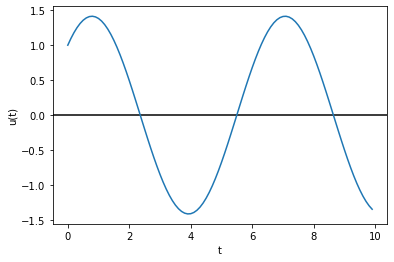

In [15]:
oscilator.plot_solution(u_0=1,du_0=1,k=1,m=1,gam=0)

#### Damped Free Vibrations

$$
 u^{\prime \prime}(t)+ 0.125 u^{\prime}(t)+ u(t)=0
$$

In [16]:
oscilator.get_solution(u_0=2,du_0=0,
             m=1,k=1,gam=0.125)

Eq(u(t), (0.12524485821703*sin(0.998044963916957*t) + 2.0*cos(0.998044963916957*t))*exp(-0.0625*t))

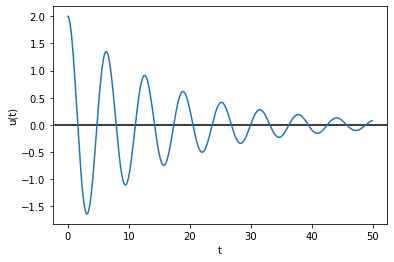

In [17]:
oscilator.plot_solution(u_0=2,du_0=0,
             m=1,k=1,gam=0.125,N=50)

### Forced vibrations

Try vibrations with different frequencies
$$
u^{\prime \prime}+0.125 u^{\prime}+u=3 \cos \omega t, \quad u(0)=2, \quad u^{\prime}(0)=0
$$

$\omega = 0.3,1,2$

In [21]:
oscilator_1 = Oscilations("3*cos(0.3*t)")
oscilator_2 = Oscilations("3*cos(t)")
oscilator_3 = Oscilations("3*cos(2*t)")

sol_1 = oscilator_1.get_solution(u_0=2,du_0=0,
                                 m=1,k=1,gam=0.125)
sol_2 = oscilator_2.get_solution(u_0=2,du_0=0,
                                 m=1,k=1,gam=0.125)
sol_3 = oscilator_3.get_solution(u_0=2,du_0=0,
                                 m=1,k=1,gam=0.125)


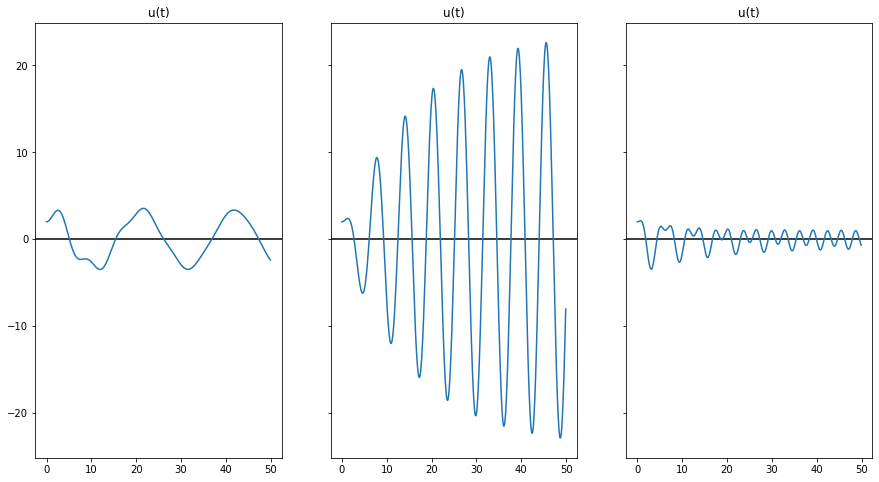

In [32]:
t = sym.Symbol("t")
func_1 = sym.lambdify(t, sol_1.rhs,'numpy')
func_2 = sym.lambdify(t, sol_2.rhs,'numpy')
func_3 = sym.lambdify(t, sol_3.rhs,'numpy')

xvals = np.arange(0,50,.1)
y1vals = func_1(xvals)
y2vals = func_2(xvals)
y3vals = func_3(xvals)

# make figure
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,8))
ax1.axhline(0, color='black')
ax1.plot(xvals, y1vals)
ax1.set_title("u(t)")
ax2.axhline(0, color='black')
ax2.plot(xvals, y2vals)
ax2.set_title("u(t)")
ax3.axhline(0, color='black')
ax3.plot(xvals, y3vals)
ax3.set_title("u(t)")
plt.show()

#### Forced Vibrations Without Damping

$$
u^{\prime \prime}+u=0.5 \cos \omega t, \quad u(0)=0, \quad u'(0)=0
$$

with $\omega = 0.8, 1$

In [55]:
oscilator_4 = Oscilations("cos(0.9*t)/2")
oscilator_5 = Oscilations("cos(t)/2")


sol_4 = oscilator_4.get_solution(u_0=0,du_0=0,
                                 m=1,k=1,gam=0)
sol_5 = oscilator_5.get_solution(u_0=0,du_0=0,
                                 m=1,k=1,gam=0)

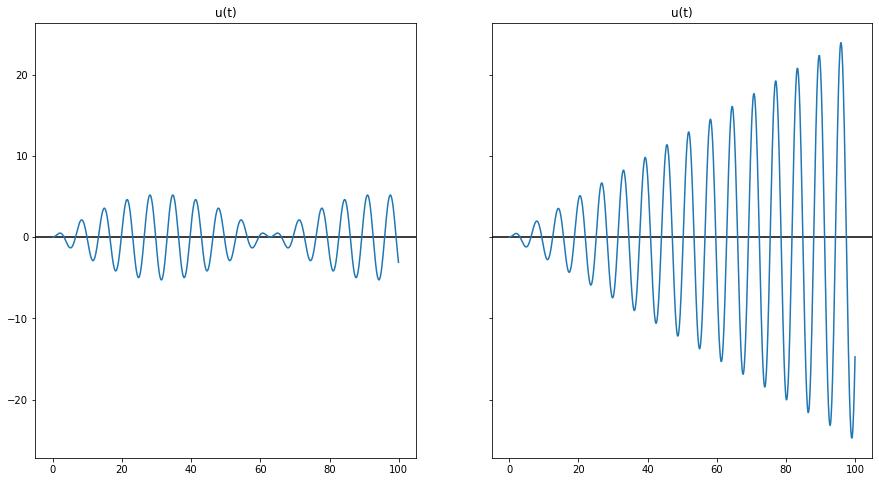

In [57]:
t = sym.Symbol("t")
func_4 = sym.lambdify(t, sol_4.rhs,'numpy')
func_5 = sym.lambdify(t, sol_5.rhs,'numpy')


xvals = np.arange(0,100,.1)
y4vals = func_4(xvals)
y5vals = func_5(xvals)


# make figure
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,8))
ax1.axhline(0, color='black')
ax1.plot(xvals, y4vals)
ax1.set_title("u(t)")
ax2.axhline(0, color='black')
ax2.plot(xvals, y5vals)
ax2.set_title("u(t)")
plt.show()